In [1]:
import pandas as pd
import os
import glob

In [2]:
path = r"C:\Users\chand\Downloads\AllVAERSDataCSVS"
files = os.listdir(path)
print(files)

['1990VAERSDATA.csv', '1990VAERSSYMPTOMS.csv', '1990VAERSVAX.csv', '1991VAERSDATA.csv', '1991VAERSSYMPTOMS.csv', '1991VAERSVAX.csv', '1992VAERSDATA.csv', '1992VAERSSYMPTOMS.csv', '1992VAERSVAX.csv', '1993VAERSDATA.csv', '1993VAERSSYMPTOMS.csv', '1993VAERSVAX.csv', '1994VAERSDATA.csv', '1994VAERSSYMPTOMS.csv', '1994VAERSVAX.csv', '1995VAERSDATA.csv', '1995VAERSSYMPTOMS.csv', '1995VAERSVAX.csv', '1996VAERSDATA.csv', '1996VAERSSYMPTOMS.csv', '1996VAERSVAX.csv', '1997VAERSDATA.csv', '1997VAERSSYMPTOMS.csv', '1997VAERSVAX.csv', '1998VAERSDATA.csv', '1998VAERSSYMPTOMS.csv', '1998VAERSVAX.csv', '1999VAERSDATA.csv', '1999VAERSSYMPTOMS.csv', '1999VAERSVAX.csv', '2000VAERSDATA.csv', '2000VAERSSYMPTOMS.csv', '2000VAERSVAX.csv', '2001VAERSDATA.csv', '2001VAERSSYMPTOMS.csv', '2001VAERSVAX.csv', '2002VAERSDATA.csv', '2002VAERSSYMPTOMS.csv', '2002VAERSVAX.csv', '2003VAERSDATA.csv', '2003VAERSSYMPTOMS.csv', '2003VAERSVAX.csv', '2004VAERSDATA.csv', '2004VAERSSYMPTOMS.csv', '2004VAERSVAX.csv', '2005VAER

In [3]:
# Function to filter CSV files for years 2015-2024
def filter_files(files):
    return [f for f in files if f.split(os.path.sep)[-1][:4].isdigit() and 2015 <= int(f.split(os.path.sep)[-1][:4]) <= 2024]

# Use glob to get all the CSV files for each dataset type (DATA, SYMPTOMS, VAX)
data_files = filter_files(glob.glob(os.path.join(path, '*VAERSDATA.csv')))
symptom_files = filter_files(glob.glob(os.path.join(path, '*VAERSSYMPTOMS.csv')))
vaccine_files = filter_files(glob.glob(os.path.join(path, '*VAERSVAX.csv')))

# Function to read and concatenate multiple the csv files
def read_and_concat(files):
    return pd.concat([pd.read_csv(f, encoding='latin1', low_memory=False) for f in files], ignore_index=True)

In [4]:
# Load the dataset
data_df = read_and_concat(data_files)
symptom_df = read_and_concat(symptom_files)
vaccine_df = read_and_concat(vaccine_files)

In [5]:
data_df.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,560330,01/01/2015,UT,1.3,1.0,0.3,M,01/01/2015,"Pinpoint rash on torso, belly, back, neck, chi...",NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,560331,01/01/2015,TN,66.0,66.0,NaN,F,01/01/2015,"Around 3:30 PM 12/22/14 shaking chills, aches,...",NaN,...,No,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [6]:
symptom_df.head(2)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,560330,Rash,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,560331,Asthenia,16.1,Chills,16.1,Headache,16.1,Laboratory test normal,16.1,Pain,16.1


In [7]:
vaccine_df.head(2)

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,560330,FLUX,UNKNOWN MANUFACTURER,NaN,1,IM,RL,INFLUENZA (SEASONAL) (NO BRAND NAME)
1,560331,FLU4,GLAXOSMITHKLINE BIOLOGICALS,AR57J,1,ID,LA,INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT)


In [8]:
# Check dataframes
print(data_df.info())
print(symptom_df.info())
print(vaccine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418326 entries, 0 to 1418325
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1418326 non-null  int64  
 1   RECVDATE      1418326 non-null  object 
 2   STATE         1173264 non-null  object 
 3   AGE_YRS       1197353 non-null  float64
 4   CAGE_YR       1079665 non-null  float64
 5   CAGE_MO       39119 non-null    float64
 6   SEX           1418326 non-null  object 
 7   RPT_DATE      116389 non-null   object 
 8   SYMPTOM_TEXT  1416362 non-null  object 
 9   DIED          20747 non-null    object 
 10  DATEDIED      17991 non-null    object 
 11  L_THREAT      18429 non-null    object 
 12  ER_VISIT      23059 non-null    object 
 13  HOSPITAL      103102 non-null   object 
 14  HOSPDAYS      60712 non-null    float64
 15  X_STAY        800 non-null      object 
 16  DISABLE       25012 non-null    object 
 17  RECOVD        1259992 non-n

# Data Preprocessing

In [10]:
# Find null values
# Check for missing values in data_df
print(data_df.isnull().sum())

# Check for missing values in sym_df
print(symptom_df.isnull().sum())

# Check for missing values in vax_df
print(vaccine_df.isnull().sum())

VAERS_ID              0
RECVDATE              0
STATE            245062
AGE_YRS          220973
CAGE_YR          338661
CAGE_MO         1379207
SEX                   0
RPT_DATE        1301937
SYMPTOM_TEXT       1964
DIED            1397579
DATEDIED        1400335
L_THREAT        1399897
ER_VISIT        1395267
HOSPITAL        1315224
HOSPDAYS        1357614
X_STAY          1417526
DISABLE         1393314
RECOVD           158334
VAX_DATE         151598
ONSET_DATE       194394
NUMDAYS          246233
LAB_DATA        1015181
V_ADMINBY             0
V_FUNDBY        1299868
OTHER_MEDS       763599
CUR_ILL         1001760
HISTORY          797367
PRIOR_VAX       1356480
SPLTTYPE         926493
FORM_VERS             0
TODAYS_DATE      129852
BIRTH_DEFECT    1417578
OFC_VISIT       1156510
ER_ED_VISIT     1277077
ALLERGIES        942575
dtype: int64
VAERS_ID                 0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            430600
SYMPTOMVERSION2     430600
SYMPTOM3    

## Handling missing values in VAERSDATA

In [12]:
def process_dataframe(data_df):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df = data_df.copy()
    
    df['STATE'].fillna('Unknown', inplace=True)
    df['AGE_YRS'].fillna(df['AGE_YRS'].median(), inplace=True)
    df['CAGE_YR'].fillna(df['CAGE_YR'].median(), inplace=True)

    

    df['RPT_DATE'].fillna('Unknown', inplace=True)
    df['SYMPTOM_TEXT'].fillna('No symptoms reported', inplace=True)

    # Some values are not filled so filled with 'no' or '0'
    for col in ['DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'X_STAY']:
        df[col].fillna('No', inplace=True)

    # Calculate the overall median of CAGE_MO (excluding NaN values)
    overall_median = df['CAGE_MO'].median()

    # Fill missing CAGE_MO values for entries where AGE_YRS is less than 1
    df.loc[df['AGE_YRS'] < 1, 'CAGE_MO'] = df.loc[df['AGE_YRS'] < 1, 'CAGE_MO'].fillna(overall_median)
        
    df['DATEDIED'].fillna('N/A', inplace=True)
    df['HOSPDAYS'].fillna(0, inplace=True)

    df['RECOVD'].fillna('Unknown', inplace=True)
    df['LAB_DATA'].fillna('No lab data', inplace=True)

    for col in ['OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX']:
        df[col].fillna('None reported', inplace=True)

    df['TODAYS_DATE'].fillna(df['TODAYS_DATE'].mode()[0], inplace=True)
    df['BIRTH_DEFECT'].fillna('No', inplace=True)
    df['ALLERGIES'].fillna('None reported', inplace=True)

    # Replace NaN values for each column
    df['VAX_DATE'].fillna('Unknown', inplace=True)
    df['DISABLE'].fillna('No', inplace=True)
    df['ONSET_DATE'].fillna('Unknown', inplace=True)
    df['NUMDAYS'].fillna(0, inplace=True)  
    df['V_FUNDBY'].fillna('Unknown', inplace=True)
    df['SPLTTYPE'].fillna('Unknown', inplace=True)
    df['OFC_VISIT'].fillna('No', inplace=True)
    df['ER_ED_VISIT'].fillna('No', inplace=True)

    return df

data_df = process_dataframe(data_df)


C:\Users\chand\AppData\Local\Temp\ipykernel_20640\1771348563.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATE'].fillna('Unknown', inplace=True)
C:\Users\chand\AppData\Local\Temp\ipykernel_20640\1771348563.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [13]:
def process_dataframe(data_df):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df = data_df.copy()
    
    # Fill missing values for various columns
    fill_values = {
        'STATE': 'Unknown',
        'RPT_DATE': 'Unknown',
        'SYMPTOM_TEXT': 'No symptoms reported',
        'DIED': 'No',
        'L_THREAT': 'No',
        'ER_VISIT': 'No',
        'HOSPITAL': 'No',
        'X_STAY': 'No',
        'DATEDIED': 'Unknown',
        'RECOVD': 'Unknown',
        'LAB_DATA': 'No lab data',
        'OTHER_MEDS': 'None reported',
        'CUR_ILL': 'None reported',
        'HISTORY': 'None reported',
        'PRIOR_VAX': 'None reported',
        'BIRTH_DEFECT': 'No',
        'ALLERGIES': 'None reported',
        'VAX_DATE': 'Unknown',
        'DISABLE': 'No',
        'ONSET_DATE': 'Unknown',
        'V_FUNDBY': 'Unknown',
        'SPLTTYPE': 'Unknown',
        'OFC_VISIT': 'No',
        'ER_ED_VISIT': 'No'
    }
    
    df.fillna(fill_values, inplace=True)
    
    # Handle numeric columns
    numeric_columns = ['AGE_YRS', 'CAGE_YR', 'HOSPDAYS', 'NUMDAYS']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].median(), inplace=True)
    
    # Handle TODAYS_DATE
    if not df['TODAYS_DATE'].empty:
        mode_date = df['TODAYS_DATE'].mode().iloc[0]
        df['TODAYS_DATE'].fillna(mode_date, inplace=True)
    
    # Calculate the overall median of CAGE_MO (excluding NaN values)
    df['CAGE_MO'] = pd.to_numeric(df['CAGE_MO'], errors='coerce')
    overall_median = df['CAGE_MO'].median()
    df['CAGE_MO'] = df['CAGE_MO'].fillna(overall_median)
    
    return df

# Apply the function to your DataFrame
data_df = process_dataframe(data_df)

C:\Users\chand\AppData\Local\Temp\ipykernel_20640\3176924828.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\chand\AppData\Local\Temp\ipykernel_20640\3176924828.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418326 entries, 0 to 1418325
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1418326 non-null  int64  
 1   RECVDATE      1418326 non-null  object 
 2   STATE         1418326 non-null  object 
 3   AGE_YRS       1418326 non-null  float64
 4   CAGE_YR       1418326 non-null  float64
 5   CAGE_MO       1418326 non-null  float64
 6   SEX           1418326 non-null  object 
 7   RPT_DATE      1418326 non-null  object 
 8   SYMPTOM_TEXT  1418326 non-null  object 
 9   DIED          1418326 non-null  object 
 10  DATEDIED      1418326 non-null  object 
 11  L_THREAT      1418326 non-null  object 
 12  ER_VISIT      1418326 non-null  object 
 13  HOSPITAL      1418326 non-null  object 
 14  HOSPDAYS      1418326 non-null  float64
 15  X_STAY        1418326 non-null  object 
 16  DISABLE       1418326 non-null  object 
 17  RECOVD        1418326 non-n

In [15]:
# standardize sex values
data_df['SEX'] = data_df['SEX'].replace({'M': 'Male', 'F': 'Female', 'U': 'Unknown'})

# Standardize text data to uppercase
text_columns = ['STATE', 'SEX', 'SYMPTOM_TEXT', 'L_THREAT', 'ER_VISIT', 
                'HOSPITAL', 'X_STAY', 'DISABLE', 'RECOVD', 'V_ADMINBY',
                'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
                'PRIOR_VAX', 'SPLTTYPE', 'BIRTH_DEFECT',
                'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']
data_df[text_columns] = data_df[text_columns].apply(lambda x: x.str.upper())

In [16]:
import pandas as pd
import numpy as np

def process_dataframe(data_df):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df = data_df.copy()
    
    # Define column types
    category_columns = ['STATE', 'SEX', 'DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 
                        'X_STAY', 'DISABLE', 'RECOVD', 'V_ADMINBY', 'V_FUNDBY', 
                        'SPLTTYPE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT']
    
    string_columns = ['RPT_DATE', 'SYMPTOM_TEXT', 'DATEDIED', 'VAX_DATE', 'ONSET_DATE', 
                      'LAB_DATA', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES']
    
    numeric_columns = ['VAERS_ID', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'HOSPDAYS', 'NUMDAYS', 'FORM_VERS']
    
    date_columns = ['RECVDATE', 'TODAYS_DATE']
    
    # Convert category columns
    for col in category_columns:
        df[col] = df[col].astype('category')
    
    # Convert string columns
    for col in string_columns:
        df[col] = df[col].astype(str).fillna('Unknown')
    
    # Convert numeric columns
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Fill numeric NaNs with median
    for col in ['AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'HOSPDAYS', 'NUMDAYS']:
        df[col] = df[col].fillna(df[col].median())
    
    # Convert date columns
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Fill date NaNs with mode
    for col in date_columns:
        if not df[col].empty:
            mode_date = df[col].mode().iloc[0]
            df[col] = df[col].fillna(mode_date)
    
    # Specific handling for certain columns
    df['DIED'] = df['DIED'].cat.add_categories(['Unknown']).fillna('Unknown')
    df['RECOVD'] = df['RECOVD'].cat.add_categories(['Unknown']).fillna('Unknown')
    
    return df

# Apply the function to your DataFrame
data_df = process_dataframe(data_df)

# Verify data types
print(data_df.dtypes)

VAERS_ID                 int64
RECVDATE        datetime64[ns]
STATE                 category
AGE_YRS                float64
CAGE_YR                float64
CAGE_MO                float64
SEX                   category
RPT_DATE                object
SYMPTOM_TEXT            object
DIED                  category
DATEDIED                object
L_THREAT              category
ER_VISIT              category
HOSPITAL              category
HOSPDAYS               float64
X_STAY                category
DISABLE               category
RECOVD                category
VAX_DATE                object
ONSET_DATE              object
NUMDAYS                float64
LAB_DATA                object
V_ADMINBY             category
V_FUNDBY              category
OTHER_MEDS              object
CUR_ILL                 object
HISTORY                 object
PRIOR_VAX               object
SPLTTYPE              category
FORM_VERS                int64
TODAYS_DATE     datetime64[ns]
BIRTH_DEFECT          category
OFC_VISI

## Handling missing data in VAERSSYMPTOMS

In [18]:
# 1. Fill missing symptoms in sym_df with 'Unknown'
for col in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
    symptom_df[col].fillna('Unknown', inplace=True)
    
# 2. Drop symptomversions columns
symptom_df.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'], inplace=True)

# 3. Standardize text data for symptom columns
symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
for col in symptom_columns:
    symptom_df[col] = symptom_df[col].str.upper()

# 4. Convert datatypes
categorical_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
symptom_df[categorical_columns] = symptom_df[categorical_columns].astype('category')

C:\Users\chand\AppData\Local\Temp\ipykernel_20640\2685020509.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  symptom_df[col].fillna('Unknown', inplace=True)


In [19]:
symptom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844343 entries, 0 to 1844342
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   VAERS_ID  int64   
 1   SYMPTOM1  category
 2   SYMPTOM2  category
 3   SYMPTOM3  category
 4   SYMPTOM4  category
 5   SYMPTOM5  category
dtypes: category(5), int64(1)
memory usage: 33.3 MB


## Handling missing values in VAERSVAX

In [21]:
import pandas as pd
import numpy as np

def process_vaccine_dataframe(vaccine_df):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df = vaccine_df.copy()
    
    # 1. Handle missing values and convert VAX_DOSE_SERIES to numeric
    for column in df.columns:
        if column == 'VAX_DOSE_SERIES':
            # Convert to numeric, replacing non-numeric values with NaN
            df[column] = pd.to_numeric(df[column], errors='coerce')
            # Fill NaN with median
            median_dose = df[column].median()
            df[column] = df[column].fillna(median_dose)
        elif df[column].dtype == 'object' or df[column].dtype.name == 'category':
            df[column] = df[column].fillna('Unknown')
        else:
            df[column] = df[column].fillna(df[column].median())

    # 2. Standardize text data
    for col in ['VAX_TYPE', 'VAX_MANU', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME']:
        df[col] = df[col].astype(str).str.upper()

    # 3. Convert data types
    category_columns = ['VAX_TYPE', 'VAX_MANU', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME']
    for col in category_columns:
        df[col] = df[col].astype('category')

    return df

# Apply the function to your DataFrame
vaccine_df = process_vaccine_dataframe(vaccine_df)

In [22]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608874 entries, 0 to 1608873
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   VAERS_ID         1608874 non-null  int64   
 1   VAX_TYPE         1608874 non-null  category
 2   VAX_MANU         1608874 non-null  category
 3   VAX_LOT          1608874 non-null  object  
 4   VAX_DOSE_SERIES  1608874 non-null  float64 
 5   VAX_ROUTE        1608874 non-null  category
 6   VAX_SITE         1608874 non-null  category
 7   VAX_NAME         1608874 non-null  category
dtypes: category(5), float64(1), int64(1), object(1)
memory usage: 46.0+ MB


# Merging all the dataframes into a single dataframe


In [24]:
# Merge data_df with symptom_df
merged_df = pd.merge(data_df, symptom_df, on='VAERS_ID', how='left')

# Merge the result with vaccine_df
final_merged_df = pd.merge(merged_df, vaccine_df, on='VAERS_ID', how='left')

# Check the shape of the final merged dataframe
print("Shape of final merged dataframe:", final_merged_df.shape)

Shape of final merged dataframe: (2106687, 47)


In [25]:
df = final_merged_df
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,560330,2015-01-01,UT,1.3,1.0,0.3,MALE,01/01/2015,"PINPOINT RASH ON TORSO, BELLY, BACK, NECK, CHI...",No,...,UNKNOWN,UNKNOWN,UNKNOWN,FLUX,UNKNOWN MANUFACTURER,Unknown,1.0,IM,RL,INFLUENZA (SEASONAL) (NO BRAND NAME)
1,560331,2015-01-01,TN,66.0,66.0,0.3,FEMALE,01/01/2015,"AROUND 3:30 PM 12/22/14 SHAKING CHILLS, ACHES,...",No,...,HEADACHE,LABORATORY TEST NORMAL,PAIN,FLU4,GLAXOSMITHKLINE BIOLOGICALS,AR57J,1.0,ID,LA,INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT)
2,560331,2015-01-01,TN,66.0,66.0,0.3,FEMALE,01/01/2015,"AROUND 3:30 PM 12/22/14 SHAKING CHILLS, ACHES,...",No,...,UNKNOWN,UNKNOWN,UNKNOWN,FLU4,GLAXOSMITHKLINE BIOLOGICALS,AR57J,1.0,ID,LA,INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT)
3,560332,2015-01-01,MN,61.0,61.0,0.3,FEMALE,01/01/2015,SHOULDER PAIN ARM PAIN STILL DO NOT HAVE FULL ...,No,...,MUSCULOSKELETAL PAIN,PAIN IN EXTREMITY,UNKNOWN,FLUX,UNKNOWN MANUFACTURER,Unknown,1.0,UNKNOWN,UNKNOWN,INFLUENZA (SEASONAL) (NO BRAND NAME)
4,560333,2015-01-01,MD,67.0,67.0,0.3,FEMALE,01/01/2015,THE WORSE HEADACHE I HAVE EVER HAD. I COULD N...,No,...,MOBILITY DECREASED,UNKNOWN,UNKNOWN,FLUX,UNKNOWN MANUFACTURER,Unknown,1.0,UNKNOWN,UNKNOWN,INFLUENZA (SEASONAL) (NO BRAND NAME)


## Exploratory Data Analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
# 1. Basic Information and Summary Statistics
print(df.info())
print(df.describe())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106687 entries, 0 to 2106686
Data columns (total 47 columns):
 #   Column           Dtype         
---  ------           -----         
 0   VAERS_ID         int64         
 1   RECVDATE         datetime64[ns]
 2   STATE            category      
 3   AGE_YRS          float64       
 4   CAGE_YR          float64       
 5   CAGE_MO          float64       
 6   SEX              category      
 7   RPT_DATE         object        
 8   SYMPTOM_TEXT     object        
 9   DIED             category      
 10  DATEDIED         object        
 11  L_THREAT         category      
 12  ER_VISIT         category      
 13  HOSPITAL         category      
 14  HOSPDAYS         float64       
 15  X_STAY           category      
 16  DISABLE          category      
 17  RECOVD           category      
 18  VAX_DATE         object        
 19  ONSET_DATE       object        
 20  NUMDAYS          float64       
 21  LAB_DATA         object        

In [29]:
# 2. Analyze Vaccine Types
vaccine_counts = df['VAX_TYPE'].value_counts()
print("Vaccine Type Counts:")
print(vaccine_counts)

Vaccine Type Counts:
VAX_TYPE
COVID19      1409333
VARZOS        119837
FLU4           58748
COVID19-2      55784
PPV            34476
              ...   
MER                2
ADEN               1
CEE                1
H5N1               1
PLAGUE             1
Name: count, Length: 102, dtype: int64


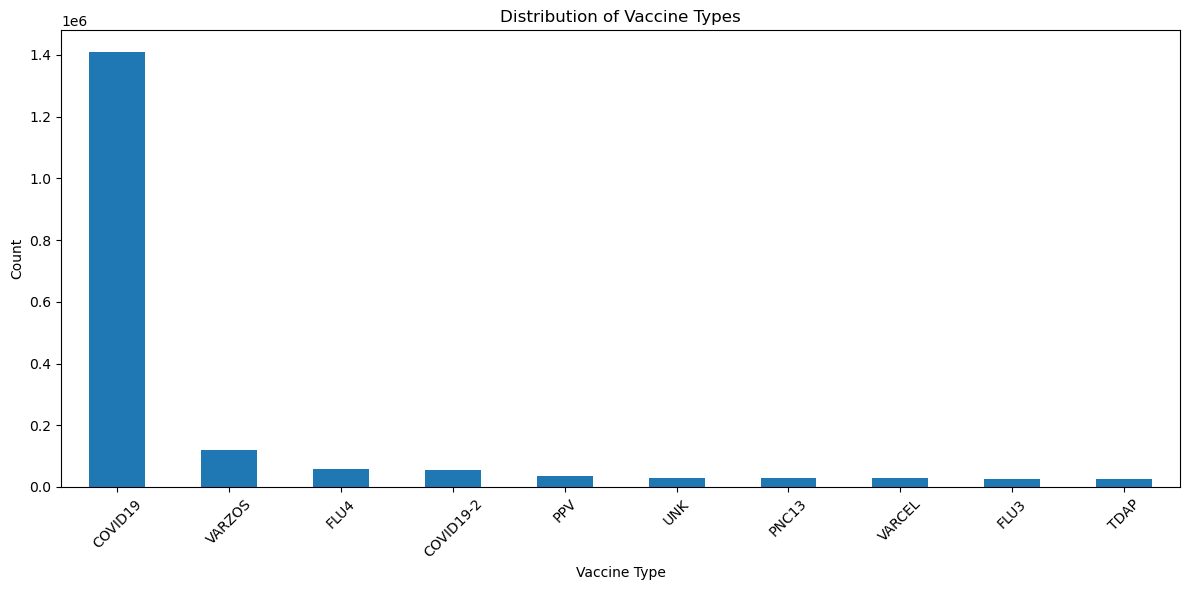

In [30]:
top_5_vaccine = vaccine_counts.head(10)
plt.figure(figsize=(12, 6))
top_5_vaccine.plot(kind='bar')
plt.title('Distribution of Vaccine Types')
plt.xlabel('Vaccine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


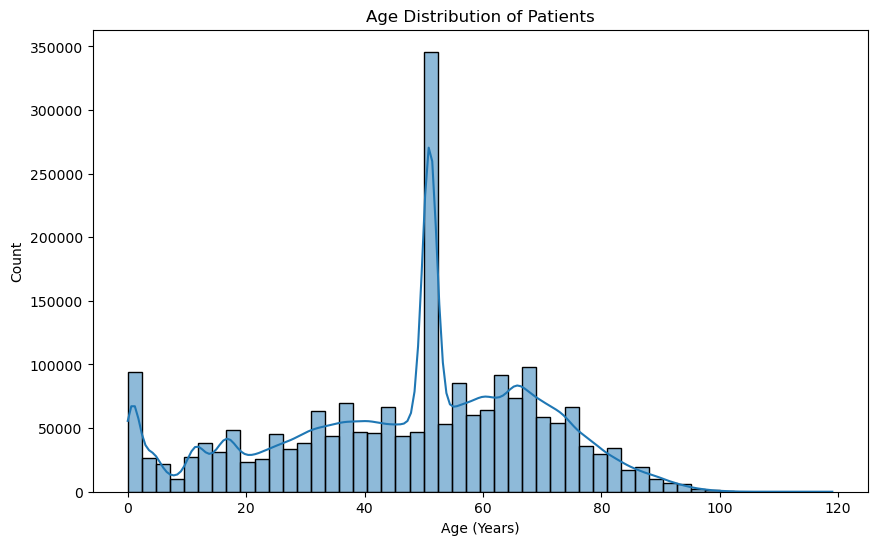

In [31]:
# 3. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE_YRS'], bins=50, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

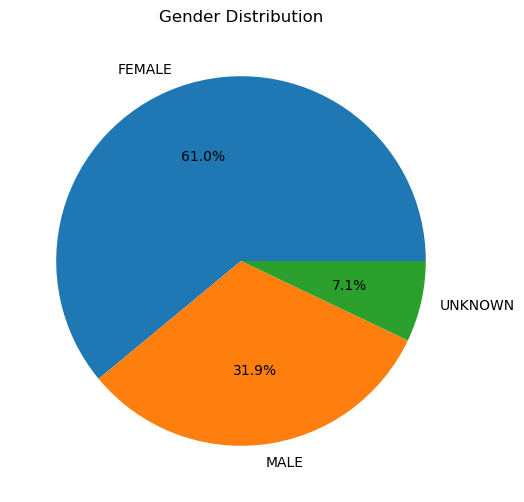

In [32]:
# 4. Gender Distribution
gender_counts = df['SEX'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

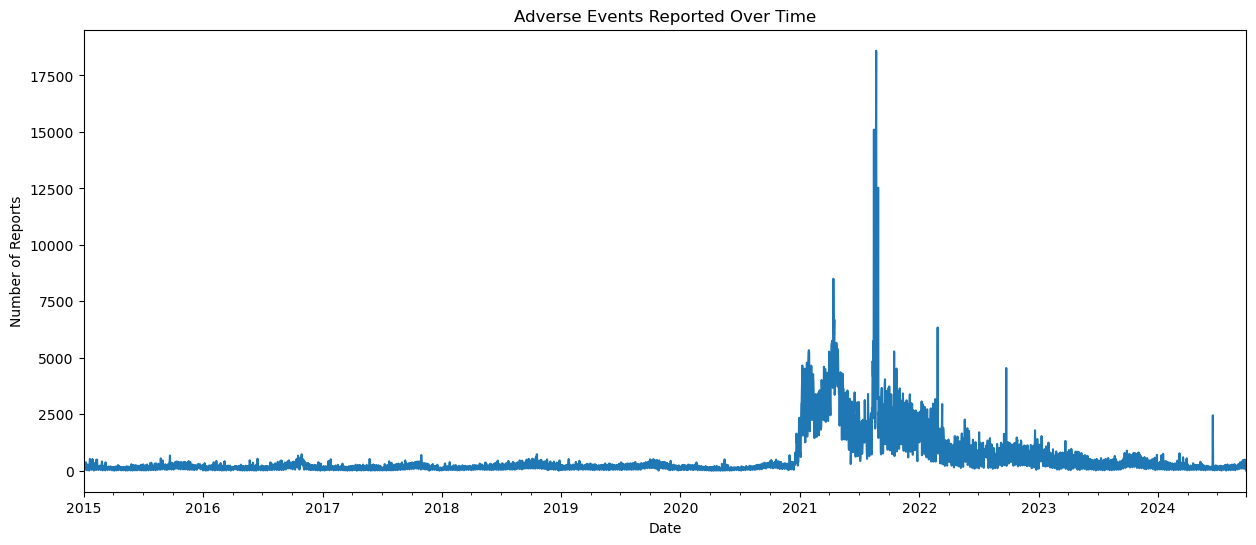

In [33]:
# 6. Adverse Events Over Time
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'])
events_over_time = df.groupby('RECVDATE').size()

plt.figure(figsize=(15, 6))
events_over_time.plot()
plt.title('Adverse Events Reported Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.show()

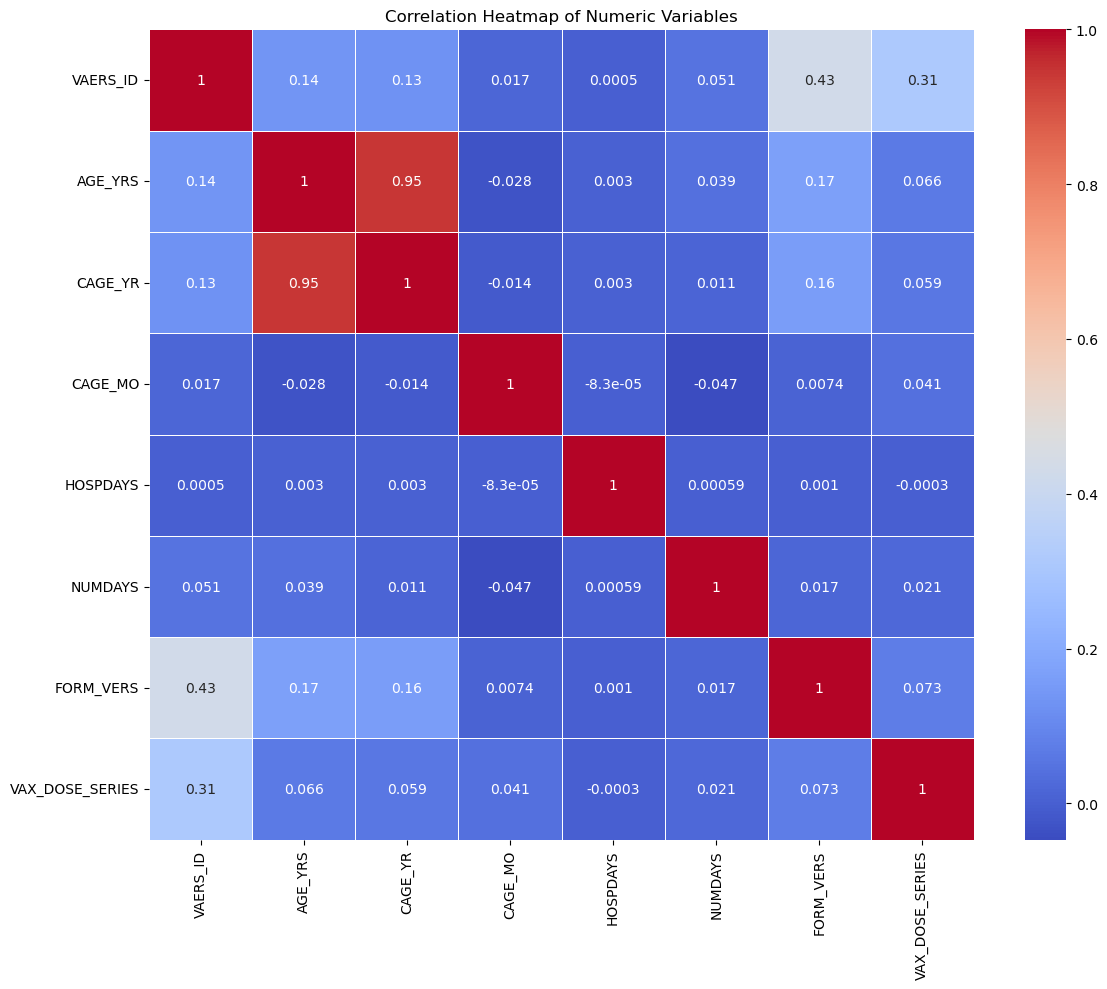

In [34]:
# 7. Correlation Heatmap (for numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

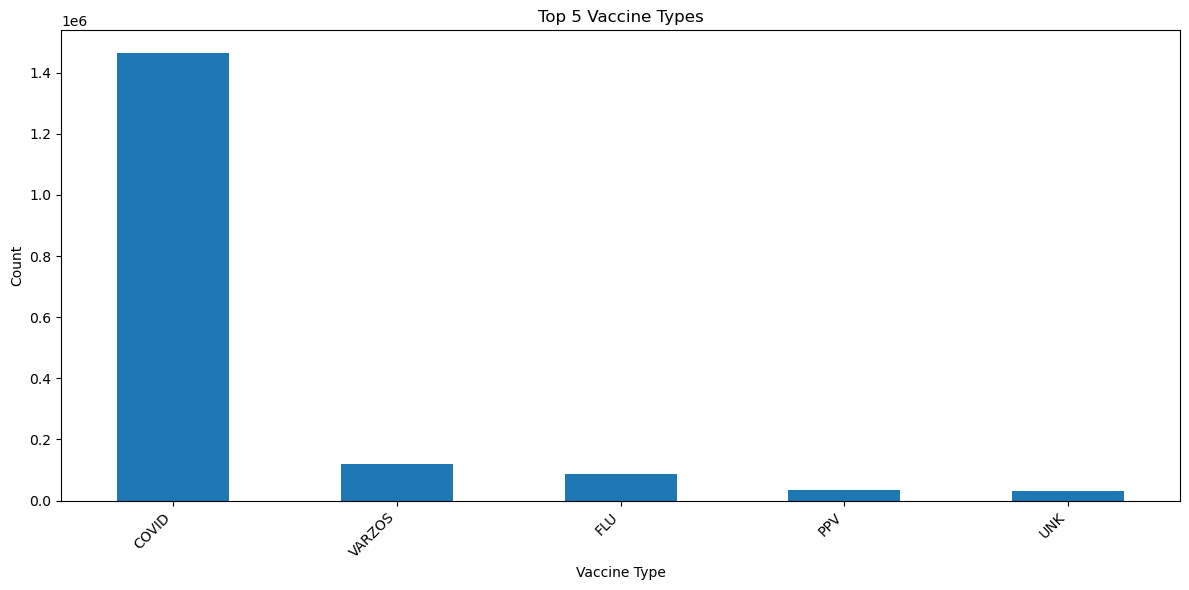

In [35]:
# Create a copy of the dataframe to avoid SettingWithCopyWarning
df_copy = df.copy()

# Add 'COVID' as a new category to VAX_TYPE if it's not already present
if 'COVID' not in df_copy['VAX_TYPE'].cat.categories:
    df_copy['VAX_TYPE'] = df_copy['VAX_TYPE'].cat.add_categories(['COVID'])

# Now you can assign 'COVID' to the appropriate rows
df_copy.loc[df_copy['VAX_TYPE'].str.contains('COVID', case=False, na=False), 'VAX_TYPE'] = 'COVID'

# Add 'FLU' as a new category if it's not already present
if 'FLU' not in df_copy['VAX_TYPE'].cat.categories:
    df_copy['VAX_TYPE'] = df_copy['VAX_TYPE'].cat.add_categories(['FLU'])

# Group flu vaccines
flu_types = ['FLU3', 'FLU4', 'FLUZ']
df_copy.loc[df_copy['VAX_TYPE'].isin(flu_types), 'VAX_TYPE'] = 'FLU'

# Count the occurrences of each vaccine type
vaccine_counts = df_copy['VAX_TYPE'].value_counts()

# Get the top 5 vaccine types
top_5_vaccines = vaccine_counts.head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_5_vaccines.plot(kind='bar')
plt.title('Top 5 Vaccine Types')
plt.xlabel('Vaccine Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

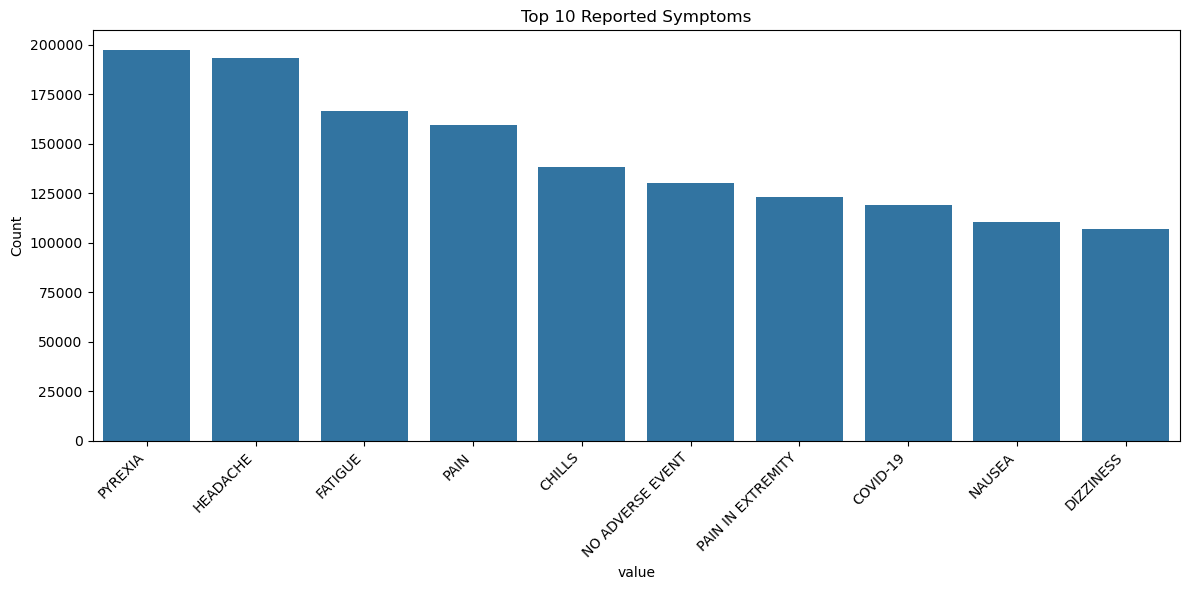

In [77]:
# Melt the symptom columns
top_symptoms = df[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].melt()

# Remove unknown and empty values
top_symptoms = top_symptoms[top_symptoms['value'].notna() & (top_symptoms['value'] != 'UNKNOWN')]

# Get the top 10 symptoms
top_symptoms = top_symptoms['value'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_symptoms.index, y=top_symptoms.values)
plt.title('Top 10 Reported Symptoms')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout to prevent cut-off labels
plt.show()

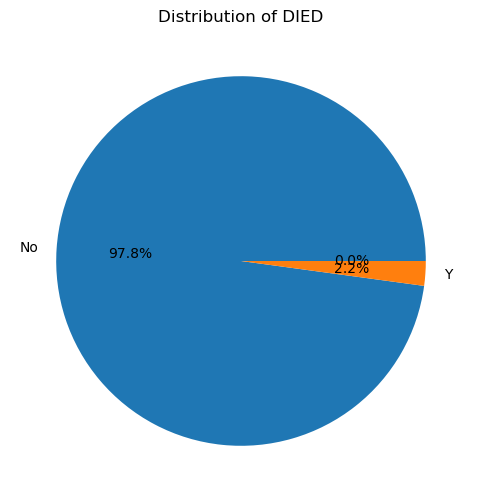

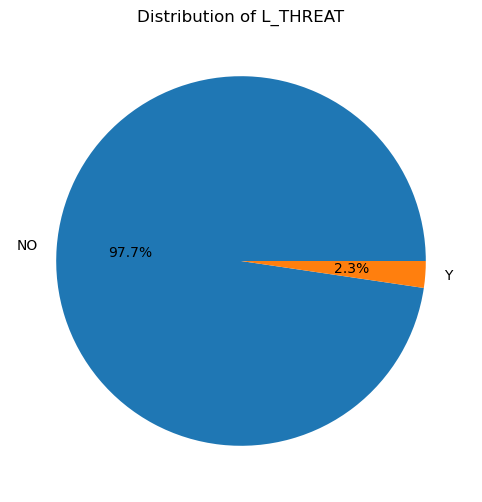

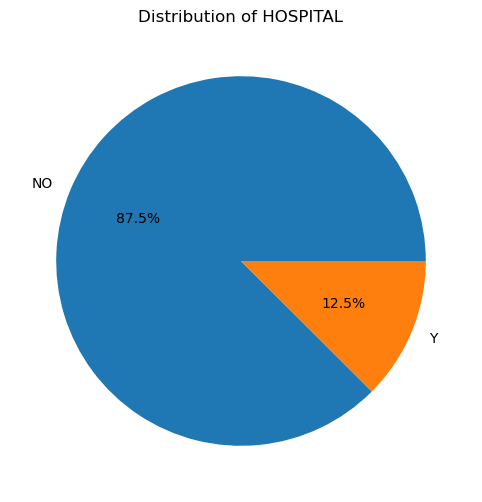

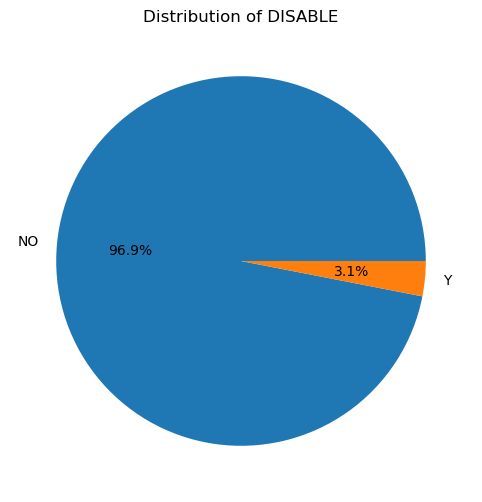

In [37]:
serious_events = ['DIED', 'L_THREAT', 'HOSPITAL', 'DISABLE']
for event in serious_events:
    plt.figure(figsize=(8, 6))
    df[event].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {event}')
    plt.ylabel('')
    plt.show()

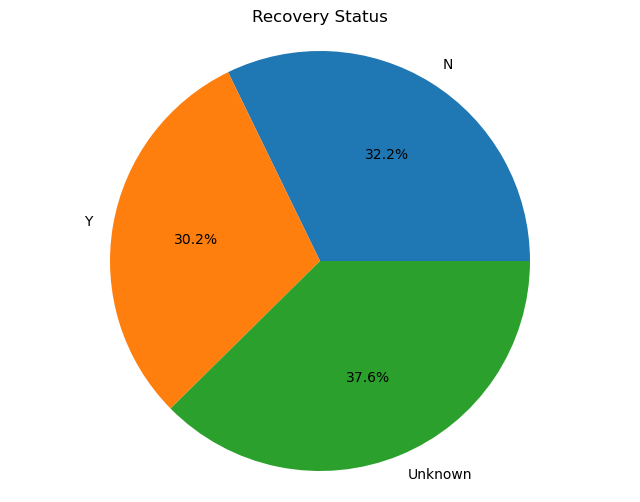

In [81]:
plt.figure(figsize=(8, 6))

# Calculate value counts
recovd_counts = df['RECOVD'].value_counts()

# Combine 'U' and 'UNKNOWN' into a single 'Unknown' category
unknown_count = recovd_counts.get('U', 0) + recovd_counts.get('UNKNOWN', 0)
recovd_counts = recovd_counts.drop(['U', 'UNKNOWN'], errors='ignore')
recovd_counts['Unknown'] = unknown_count

# Create the pie chart
recovd_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Recovery Status')
plt.ylabel('')
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()

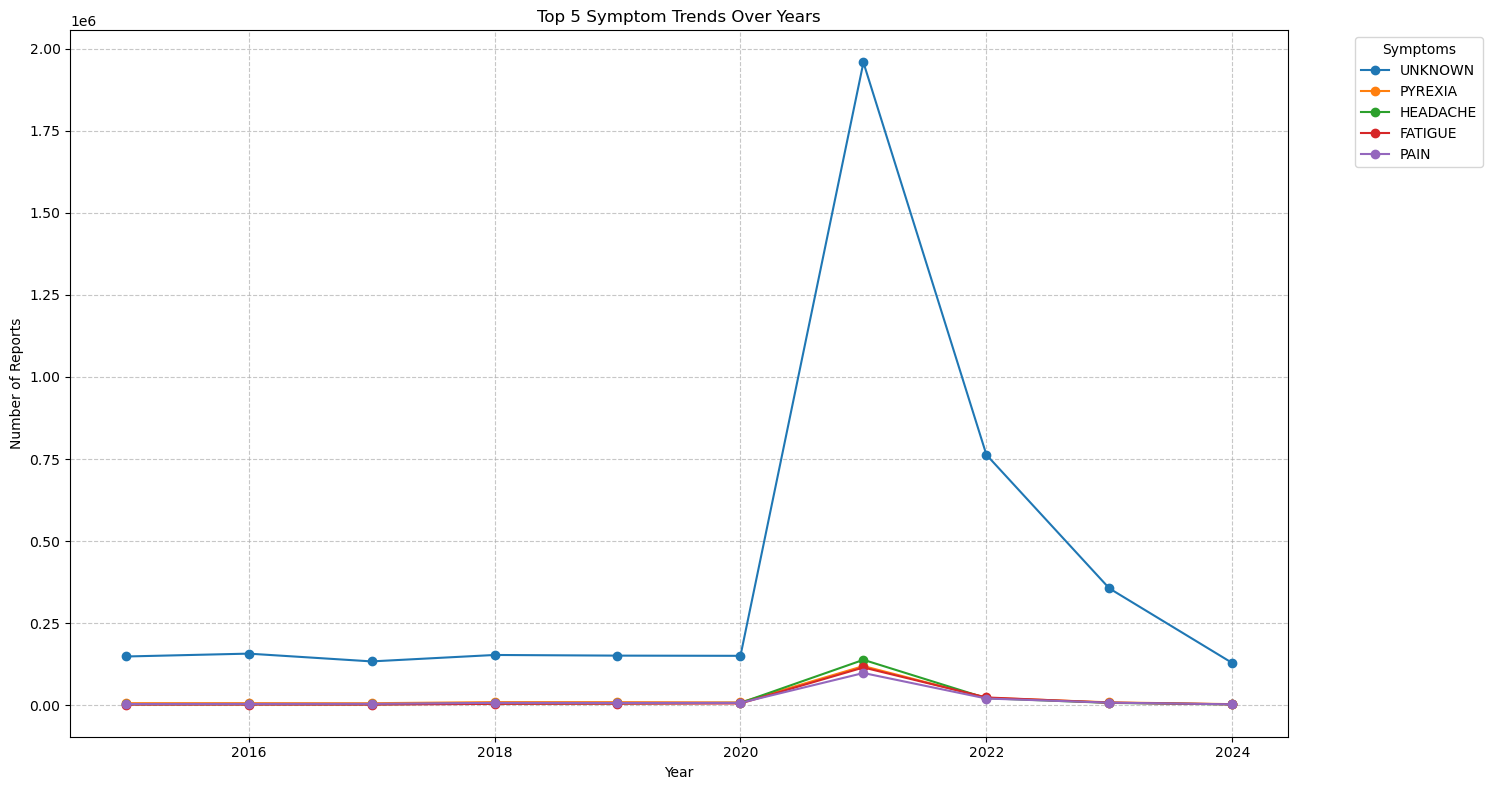

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert RECVDATE to datetime if it's not already
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'])

# Extract year from RECVDATE
df['YEAR'] = df['RECVDATE'].dt.year

# Melt the symptom columns
symptoms_df = df[['YEAR', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].melt(id_vars=['YEAR'], var_name='SYMPTOM_COL', value_name='SYMPTOM')

# Remove unknown and empty values
symptoms_df = symptoms_df[symptoms_df['SYMPTOM'].notna() & (symptoms_df['SYMPTOM'] != 'Unknown')]

# Get the top 5 symptoms overall
top_symptoms = symptoms_df['SYMPTOM'].value_counts().nlargest(5).index

# Filter for only the top 5 symptoms
symptoms_df = symptoms_df[symptoms_df['SYMPTOM'].isin(top_symptoms)]

# Count occurrences of each symptom per year
symptom_counts = symptoms_df.groupby(['YEAR', 'SYMPTOM']).size().unstack(fill_value=0)

# Plot the trend
plt.figure(figsize=(15, 8))
for symptom in top_symptoms:
    plt.plot(symptom_counts.index, symptom_counts[symptom], label=symptom, marker='o')

plt.title('Top 5 Symptom Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.legend(title='Symptoms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()